# Project Title: NFL Team Attendance Variety and Influencing Factors

# Team Members
*   Jiayu Pan (jiayup)
*   Tianyi Xiong (xiongty)
*   Jinren Yuan (yjinren)



# Overview<br>
Our project intends to research the variety of NFL team attendance (mainly home attendance) and figure out the influencing factors for team attendance. We have collected NFL team attendance data from 2000–2019. The influencing factors we plan to research include team standings, the GDP of the team's location, and stadium renovation. We will be applying correlation analysis and hypothesis testing to find the relationship between these factors and team attendance.

# Motivation

The attendance of NFL teams differs from each other, and there's a common belief that teams with small markets have lower attendance. As football fans, we want to explore the actual distribution of attendance among the NFL teams as well as the factors that influence attendance.<br>

<b>Here are the real world questions we will try to answer:</b><br>
<ol>
<li>To what degree does the Gross Domestic Product (GDP) of a county correlate with the attendance figures of its local sports team?</li>
<li>How significantly does the performance of a sports team, as reflected by their win-loss record, affect their game attendance numbers?
<li>Does the renovation of the stadium increase the home attendance significantly?

</ol>

By answering these questions, we will analyze the potential factors that influence NFL team attendance, as well as getting suggestions for teams to increase the attendance.

# Data Sources
To answer the questions, we will utilize data from three key sources:

1. **NFL Stadium Attendance Dataset**: This dataset (attendance.csv), available on Kaggle, encompasses details such as team city, team name, year, along with additional insights regarding ratings and points for the NFL seasons spanning from 2000 to 2019. [View Dataset](https://www.kaggle.com/datasets/sujaykapadnis/nfl-stadium-attendance-dataset)

2. **NFL Team Standings Dataset**: The dataset(standings.csv), also avaliable on Kaggle, includes NFL teams' standings data from 2000-2019, with the number of wins and loses. [View Dataset](https://www.kaggle.com/datasets/sujaykapadnis/nfl-stadium-attendance-dataset?select=standings.csv)

3. **NFL Stadium Comparisons**: Hosted on the Stadiums of Pro Football website, this dataset offers comprehensive comparisons of NFL stadiums, including the names of stadiums, team names, stadium capacities, opening dates, types of turf, and construction costs. [Explore Comparisons](https://www.stadiumsofprofootball.com/comparisons/)

4. **Highest GDP Counties in the USA**: Also available on Kaggle, this dataset (highest_gdp.csv) provides information on the GDP of the highest GDP counties in the USA, detailing the economic outputs of each region from 2001 to 2018. [Access Dataset](https://www.kaggle.com/datasets/muhammadanasmahmood/highest-gdp-counties-in-usa)

5. **Team location dataset**: The dataset(team_location.csv) contains information on various teams, including their names, the counties, and states they are located in the United States. It was created with the help of GEN AI to ensure accuracy and is intended for use in merging with other datasets for analysis. [Access reference](https://www.datapandas.org/ranking/nfl-teams-by-state)

The NFL Stadium Attendance dataset, which details team cities and names alongside attendance figures, offers valuable insights into fan engagement across seasons. This dataset can be effectively combined with the `NFL Team Standings dataset` to explore possible links between a team's performance and its stadium attendance.<br>

Additionally, integrating this data with the `Highest GDP Counties in the USA` dataset may reveal economic influences on attendance patterns. The overarching goal is to utilize the Team Location dataset to facilitate a seamless merging process, ensuring each team's location data aligns across the different datasets for accurate and comprehensive analysis.<br>

Last but not least, the `NFL Stadium Comparisons` can be used to find out the teams that renovated the stadiums in the time period, which can be further applied the influence of stadium renovation on attendance.

# Data Description


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the csv files and save as DataFrames
gdpcounty = pd.read_csv('county_gdp.csv')
stadium_comparison = pd.read_csv('wpdt_export.csv')
attendance = pd.read_csv('attendance.csv')
standing = pd.read_csv('standings.csv')
team_location = pd.read_csv('team_location.csv')

In [3]:
# look at the missing values of the DataFrames
print(gdpcounty.isna().sum())
print(standing.isna().sum())
print(attendance.isna().sum())
print(stadium_comparison.isna().sum())
print(team_location.isna().sum())

index              0
Year               0
Region             0
SUB_REGION         0
State              0
County             0
GDP (Chained $)    0
dtype: int64
team                    0
team_name               0
year                    0
wins                    0
loss                    0
points_for              0
points_against          0
points_differential     0
margin_of_victory       0
strength_of_schedule    0
simple_rating           0
offensive_ranking       0
defensive_ranking       0
playoffs                0
sb_winner               0
dtype: int64
team                   0
team_name              0
year                   0
total                  0
home                   0
away                   0
week                   0
weekly_attendance    638
dtype: int64
Name        0
Team(s)     0
Capacity    0
Opened      0
Turf        0
Cost        0
dtype: int64
Team      0
County    0
State     0
dtype: int64


In [4]:
# describe the missing values in the 'weekly_attendance' column of DataFrame attendance
attendance['weekly_attendance'].dropna().describe()

count     10208.000000
mean      67556.876567
std        9022.015325
min       23127.000000
25%       63245.500000
50%       68334.000000
75%       72544.750000
max      105121.000000
Name: weekly_attendance, dtype: float64

In [5]:
stadium_comparison['Capacity'] = stadium_comparison['Capacity'].str.replace(',', '').astype(float)
stadium_comparison['Capacity'].describe()

count       30.000000
mean     70276.666667
std       5522.435078
min      61500.000000
25%      65967.500000
50%      68620.000000
75%      73670.000000
max      82500.000000
Name: Capacity, dtype: float64

In [6]:
# Perform groupby and describe
state_gdp_stats = gdpcounty.groupby('State')['GDP (Chained $)'].describe()

# Sort by the 'mean' descending and take the top 5
state_gdp_stats.sort_values(by='mean', ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
District of Columbia,18.0,1.072705e+11,1.054863e+10,8.850579e+10,1.000265e+11,1.083555e+11,1.143665e+11,1.239820e+11
California,1044.0,3.698555e+10,8.692784e+10,1.463770e+08,1.640616e+09,7.526621e+09,2.634346e+10,7.108930e+11
Massachusetts,252.0,3.037840e+10,3.571847e+10,1.245692e+09,5.834866e+09,1.961532e+10,3.852276e+10,1.573840e+11
Connecticut,144.0,3.020819e+10,2.960782e+10,3.978009e+09,6.877961e+09,1.278640e+10,5.136034e+10,8.992901e+10
New Jersey,378.0,2.474083e+10,1.775188e+10,3.931240e+09,6.619169e+09,2.237382e+10,3.565366e+10,6.614889e+10


In [7]:
print(f"The number of rows and columns of attendance dataset" , attendance.shape)
print(f"The number of rows and columns of standing dataset" , standing.shape)
print(f"The number of rows and columns of gdpcounty dataset" , gdpcounty.shape)
print(f"The number of rows and columns of stadium_comparison dataset" , stadium_comparison.shape)
print(f"The number of rows and columns of team_location dataset" , team_location.shape)

The number of rows and columns of attendance dataset (10846, 8)
The number of rows and columns of standing dataset (638, 15)
The number of rows and columns of gdpcounty dataset (55501, 7)
The number of rows and columns of stadium_comparison dataset (30, 6)
The number of rows and columns of team_location dataset (32, 3)


In [8]:
print(f"The Total number of element in attendance dataset is" , attendance.size)
print(f"The Total number of element in standing dataset is" , standing.size)
print(f"The Total number of element in gdpcounty dataset is" , gdpcounty.size)
print(f"The Total number of element in stadium_comparison dataset is" , stadium_comparison.size)
print(f"The Total number of element in team_location dataset is" , team_location.size)

The Total number of element in attendance dataset is 86768
The Total number of element in standing dataset is 9570
The Total number of element in gdpcounty dataset is 388507
The Total number of element in stadium_comparison dataset is 180
The Total number of element in team_location dataset is 96


# **NFL Stadium Attendance Dataset**

1. **Variables of Interest**:Team, Team Name, Year,home attendance
2. **Missing Values**: Weekly Attendance has 638 missing entries
3. **Dataset Size**: 10846(row) * 8(column)
4. **Data Source**: Kaggle
5. **Dataset Usability**: 10.00 (Information from Kaggle)
6. **Total Number of Element**: 86768
7. **Average Weekly Attendence**: The **average weekly attendance** for NFL season games from 2000 to 2019 is around 67557.

# **NFL Team Standings Dataset**
1. **Variables of Interest**: team, wins, loss, offensive_ranking, defensive_ranking, playoffs, sb_winner
2. **Missing Values**: None reported
3. **Dataset Size**: 638(row) * 16(column)
4. **Data Source**: Kaggle (Information from Kaggle)
5. **Dataset Usability**: N/A
6. **Total Number of Element**: 9570

# **NFL Stadium Comparisons Dataset**
1. **Variables of Interest**: Name, Team(s), Capacity, Opened, Turf, Cost
2. **Missing Values**: None reported
3. **Dataset Size**: 30(row) * 6(column)
4. **Data Source**: Stadiums of Pro Football
5. **Dataset Usability**: N/A
6. **Total Number of Element**: 180
7. **Average Stadium Capacity**: The **mean capacity** of the NFL stadium is around 70277.

# **Highest GDP Counties in the USA Dataset**
1. **Variables of Interest**: Year, Region, Sub_Region, State, County, GDP
2. **Missing Values**: None reported
3. **Dataset Size**: 55501(row) * 7(column)
4. **Data Source**: Kaggle
5. **Dataset Usability**: 9.41 (Information from Kaggle)
6. **Total Number of Element**: 388507
7. **Top 5 States with the highest mean GDP**: The District of Columbia, California, Massachusetts, Connecticut, and New Jersey have the top 5 highest mean GDPs from 2001 to 2018.

# **NFL Team_Location Dataset**
1. **Variables of Interest**: Team, County, State
2. **Missing Values**: None reported
3. **Dataset Size**: 32(row) * 3(column)
4. **Data Source**: Data Source is created by our team with the help from GEN AI
5. **Dataset Usability**: N/A
6. **Total Number of Element**: 96


**The above details encompass a wealth of data; however, for demonstration purposes, we will only consider a subset of the information pertinent to the data description.**

# Data Manipulation
## Steps
<ul>


1.   **Handle Missing Values**: Addressed any gaps in data to maintain integrity.

2.   **Standardize Format**: Ensured consistency in text format, spacing, and measurement units across all datasets.

1.   **Combine Data Sources**: Merged multiple datasets into a single, comprehensive dataset.
2.   **Create new columns**: Introduced a new metric, 'win_percentage', to reflect the team performance. And create a new column "renovated" to show whether the stadium was renovated that year.





In [9]:
# Clean the attendance DataFrame
# Create a new DataFrame called attendance_clean and fill the missing values in the "weekly_attendance" column with mean values
attendance_clean = attendance
mean_weekly_attendance_per_team = attendance_clean.groupby('team')['weekly_attendance'].transform('mean')
attendance_clean['weekly_attendance'] = attendance_clean['weekly_attendance'].fillna(mean_weekly_attendance_per_team)

# Round the weekly_attendance values to 2 digit
attendance_clean['weekly_attendance'] = attendance_clean['weekly_attendance'].round(2)

# Rename the columns
attendance_clean.rename(columns={'home': 'home_attendance', 'away': 'away_attendance'}, inplace=True)

# Convert the year values to str
attendance_clean.loc[:, 'year'] = attendance_clean['year'].astype(str)

attendance_clean.head()

,team,team_name,year,total,home_attendance,away_attendance,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.00
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.00
2,Arizona,Cardinals,2000,893926,387475,506451,3,61452.01
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.00
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.00


In [10]:
# Clean the standing DataFrame
# Create a clean DataFrame for standings and choose the needed columns
standing['superbowl_winner'] = standing['sb_winner'].apply(lambda x:0 if x =='No Superbowl' else 1) # rename the column with 0 (No Superbowl) and 1 (Superbowl)
standing_clean = standing[['team', 'team_name', 'year', 'wins', 'loss', 'playoffs', 'superbowl_winner']]

# Create a copy of the DataFrame
standing_clean = standing_clean.copy()

# Create a new column to store the win percentage of the team
standing_clean['win_percentage'] = round(standing_clean['wins']/(standing['wins'] + standing['loss']),2)

# Convert the year values to string
standing_clean.loc[:, 'year'] = standing_clean['year'].astype(str)

standing_clean.head()

,team,team_name,year,wins,loss,playoffs,superbowl_winner,win_percentage
0,Miami,Dolphins,2000,11,5,Playoffs,0,0.69
1,Indianapolis,Colts,2000,10,6,Playoffs,0,0.62
2,New York,Jets,2000,9,7,No Playoffs,0,0.56
3,Buffalo,Bills,2000,8,8,No Playoffs,0,0.50
4,New England,Patriots,2000,5,11,No Playoffs,0,0.31


In [11]:
# merge the attendance_clean DataFrame with the standing_clean DataFrame
attendance_standing = attendance_clean.merge(standing_clean, on=['team_name', 'year'], how='inner')

# drop the duplicate column
attendance_standing.drop(columns=['team_y'], inplace=True)
attendance_standing.rename(columns={'team_x': 'team'}, inplace=True)

attendance_standing.head()

,team,team_name,year,total,home_attendance,away_attendance,week,weekly_attendance,wins,loss,playoffs,superbowl_winner,win_percentage
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.00,3,13,No Playoffs,0,0.19
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.00,3,13,No Playoffs,0,0.19
2,Arizona,Cardinals,2000,893926,387475,506451,3,61452.01,3,13,No Playoffs,0,0.19
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.00,3,13,No Playoffs,0,0.19
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.00,3,13,No Playoffs,0,0.19


In [12]:
# Clean the gdpcounty DataFrame
# Create a clean DataFrame for county gdp and choose the needed columns
gdpcounty_clean = gdpcounty[['Year', 'State', 'County', 'GDP (Chained $)']]

# Create a copy of the DataFrame
gdpcounty_clean = gdpcounty_clean.copy()

# Convert the gdp values to float and denote them by million
gdpcounty_clean['GDP (Chained $)'] = gdpcounty_clean['GDP (Chained $)'].astype(float)
gdpcounty_clean['GDP (Chained $)'] = round(gdpcounty_clean['GDP (Chained $)']/1000000, 2)

# Remove the spaces in column "State" and "County"
gdpcounty_clean['State'] = gdpcounty_clean['State'].str.strip()
gdpcounty_clean['County'] = gdpcounty_clean['County'].str.strip()

# Rename the columns to uniform the case
gdpcounty_clean.rename(columns={'Year': 'year', 'State': 'state', 'County': 'county', 'GDP (Chained $)': 'gdp_chained_million$'}, inplace=True)

# Convert the year values to string
gdpcounty_clean.loc[:, 'year'] = gdpcounty_clean['year'].astype(str)

gdpcounty_clean.head()

,year,state,county,gdp_chained_million$
0,2001,Alabama,Autauga,954.59
1,2001,Alabama,Baldwin,3929.75
2,2001,Alabama,Barbour,813.28
3,2001,Alabama,Bibb,292.69
4,2001,Alabama,Blount,810.38


In [13]:
# Clean the team_location DataFrame
team_location_clean = team_location

# Create a copy of the DataFrame
team_location_clean = team_location_clean.copy()

# Create a new column to show the team name
team_location_clean['team_name'] = team_location_clean['Team'].str.split(" ")
team_location_clean['team_name'] = team_location_clean['team_name'].str[-1]

# Reorder the columns
team_location_clean = team_location_clean[['team_name', 'State', 'County']]

# Remove the spaces in column "State" and "County"
team_location_clean['State'] = team_location_clean['State'].str.strip()
team_location_clean['County'] = team_location_clean['County'].str.strip()

# Rename the columns to uniform the case
team_location_clean.rename(columns={'State': 'state', 'County': 'county'}, inplace=True)

team_location_clean.head()

,team_name,state,county
0,Cardinals,Arizona,Maricopa
1,Falcons,Georgia,Fulton
2,Ravens,Maryland,Baltimore
3,Bills,New York,Erie
4,Panthers,North Carolina,Mecklenburg


In [14]:
stadium_comparison.head()

,Name,Team(s),Capacity,Opened,Turf,Cost
0,Acrisure Stadium,Pittsburgh Steelers,68400.0,07/10/2001,Grass,$281 Million
1,Allegiant Stadium,Las Vegas Raiders,65000.0,21/09/2020,Grass,$1.9 Billion
2,Arrowhead Stadium,Kansas City Chiefs,76416.0,12/08/1972,Grass,$43 Million
3,AT&T Stadium,Dallas Cowboys,80000.0,20/09/2009,FieldTurf,$1.3 Billion
4,Bank of America Stadium,Carolina Panthers,74867.0,14/09/1996,Grass,$242 Million


In [15]:
# Clean the stadium_comparison DataFrame
stadium_comparison_clean = stadium_comparison
# Create a copy of the DataFrame
stadium_comparison_clean = stadium_comparison_clean.copy()
stadium_comparison_clean.head()
# Create a new column to show the team name
stadium_comparison_clean['team_name'] = stadium_comparison_clean['Team(s)'].str.split(" ")
stadium_comparison_clean['team_name'] = stadium_comparison_clean['team_name'].str[-1]

# Convert the Opened column to datetime
stadium_comparison_clean['Opened'] = pd.to_datetime(stadium_comparison_clean['Opened'], format='%d/%m/%Y')

# Create a new column to show the year the stadium was opened
stadium_comparison_clean['year_opened'] = stadium_comparison_clean['Opened'].dt.year

# Rename the columns to uniform the case
stadium_comparison_clean.rename(columns={'Name': 'stadium_name', 'Team(s)': 'team', 'Capacity': 'capacity', 'Opened': 'opened', 'Turf': 'turf', 'Cost': 'cost'}, inplace=True)
stadium_comparison_clean.head()

# Reorder the columns and select the needed columns
stadium_comparison_clean = stadium_comparison_clean[[ 'stadium_name', 'team', 'team_name', 'capacity', 'opened', 'year_opened', 'cost']]

# separate the values with multiple teams and create a new row for each team
new_row_1 = pd.DataFrame(stadium_comparison_clean.iloc[24])
new_row_1 = new_row_1.transpose()
new_row_2 = pd.DataFrame(stadium_comparison_clean.iloc[19])
new_row_2 = new_row_2.transpose()
stadium_comparison_clean = pd.concat([stadium_comparison_clean, new_row_1], ignore_index=True)
stadium_comparison_clean = pd.concat([stadium_comparison_clean, new_row_2], ignore_index=True)
stadium_comparison_clean.loc[24, 'team_name'] = 'Chargers'
stadium_comparison_clean.loc[19, 'team_name'] = 'Giants'
stadium_comparison_clean.loc[24, 'team'] = 'Los Angeles Chargers'
stadium_comparison_clean.loc[19, 'team'] = 'New York Giants'
stadium_comparison_clean.loc[30, 'team_name'] = 'Rams'
stadium_comparison_clean.loc[30, 'team'] = 'Los Angeles Rams'
stadium_comparison_clean.loc[31, 'team_name'] = 'Jets'
stadium_comparison_clean.loc[30, 'team'] = 'New York Jets'

stadium_comparison_clean.head()

,stadium_name,team,team_name,capacity,opened,year_opened,cost
0,Acrisure Stadium,Pittsburgh Steelers,Steelers,68400.0,2001-10-07 00:00:00,2001,$281 Million
1,Allegiant Stadium,Las Vegas Raiders,Raiders,65000.0,2020-09-21 00:00:00,2020,$1.9 Billion
2,Arrowhead Stadium,Kansas City Chiefs,Chiefs,76416.0,1972-08-12 00:00:00,1972,$43 Million
3,AT&T Stadium,Dallas Cowboys,Cowboys,80000.0,2009-09-20 00:00:00,2009,$1.3 Billion
4,Bank of America Stadium,Carolina Panthers,Panthers,74867.0,1996-09-14 00:00:00,1996,$242 Million


In [16]:
# merge the gdp county DataFrame with the team location DataFrame
team_county_gdp = team_location_clean.merge(gdpcounty_clean, on=["state", "county"], how="inner")
team_county_gdp = team_county_gdp.sort_values(by=['team_name', 'year'], ascending=True)
team_county_gdp.head()

,team_name,state,county,year,gdp_chained_million$
503,49ers,California,Santa Clara,2001,116251.0
515,49ers,California,Santa Clara,2002,111226.0
518,49ers,California,Santa Clara,2003,117938.0
516,49ers,California,Santa Clara,2004,123329.0
514,49ers,California,Santa Clara,2005,131567.0


In [17]:
# merge DataFrames
attendance_standing_gdp = attendance_standing.merge(team_county_gdp, on=['team_name', 'year'], how='inner')

# calculate the mean gdp for counties that have multiple gdp values in one year
attendance_standing_gdp['gdp_chained_million$'] = attendance_standing_gdp.groupby(['year','county'])['gdp_chained_million$'].transform('mean')

attendance_standing_gdp.head()

,team,team_name,year,total,home_attendance,away_attendance,week,weekly_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$
0,Arizona,Cardinals,2001,811391,307315,504076,1,61452.01,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0
1,Arizona,Cardinals,2001,811391,307315,504076,2,50913.00,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0
2,Arizona,Cardinals,2001,811391,307315,504076,3,28878.00,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0
3,Arizona,Cardinals,2001,811391,307315,504076,4,66360.00,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0
4,Arizona,Cardinals,2001,811391,307315,504076,5,66944.00,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0


In [18]:
# Create a samller DataFrame withuot the weekly attendance data
annual_data = attendance_standing_gdp[['team', 'team_name', 'year', 'total', 'home_attendance', 'away_attendance', 'wins', 'loss', 'playoffs', 'superbowl_winner', 'win_percentage', 'state', 'county', 'gdp_chained_million$']]

#Create a copy of the DataFrame
annual_data = annual_data.copy()

annual_data.drop_duplicates(inplace=True)
annual_data.head()

,team,team_name,year,total,home_attendance,away_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$
0,Arizona,Cardinals,2001,811391,307315,504076,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.000
17,Atlanta,Falcons,2001,917882,425717,492165,7,9,No Playoffs,0,0.44,Georgia,Fulton,106239.000
34,Baltimore,Ravens,2001,1064731,554991,509740,10,6,Playoffs,0,0.62,Maryland,Baltimore,39339.185
68,Buffalo,Bills,2001,1005954,504736,501218,3,13,No Playoffs,0,0.19,New York,Erie,39996.480
85,Carolina,Panthers,2001,1085651,579080,506571,1,15,No Playoffs,0,0.06,North Carolina,Mecklenburg,56262.350


In [19]:
# merge the annual_data DataFrame with the stadium_comparison_clean DataFrame
clean_data = annual_data.merge(stadium_comparison_clean, on=['team_name'], how='inner')
clean_data = clean_data.copy()
# select the needed columns
clean_data = clean_data[['team_x', 'team_name', 'year', 'total', 'home_attendance', 'away_attendance', 'wins', 'loss', 'playoffs', 'superbowl_winner', 'win_percentage', 'state', 'county', 'gdp_chained_million$','year_opened']]
clean_data.rename(columns={'team_x': 'team', 'year_opened': 'stadium_renovation_year'}, inplace=True)
# create a column that shows True if the stadium was renovated in the year
clean_data['renovated'] = clean_data['year'].astype(int) == clean_data['stadium_renovation_year'].astype(int)
clean_data.head(10)

,team,team_name,year,total,home_attendance,away_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$,stadium_renovation_year,renovated
0,Arizona,Cardinals,2001,811391,307315,504076,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0,2006,False
1,Arizona,Cardinals,2002,898877,327272,571605,5,11,No Playoffs,0,0.31,Arizona,Maricopa,150559.0,2006,False
2,Arizona,Cardinals,2003,804401,288499,515902,4,12,No Playoffs,0,0.25,Arizona,Maricopa,160947.0,2006,False
3,Arizona,Cardinals,2004,838557,300267,538290,6,10,No Playoffs,0,0.38,Arizona,Maricopa,169495.0,2006,False
4,Arizona,Cardinals,2005,920848,401035,519813,5,11,No Playoffs,0,0.31,Arizona,Maricopa,184185.0,2006,False
5,Arizona,Cardinals,2006,1041022,508829,532193,5,11,No Playoffs,0,0.31,Arizona,Maricopa,193803.0,2006,True
6,Arizona,Cardinals,2007,1072427,516646,555781,8,8,No Playoffs,0,0.50,Arizona,Maricopa,196924.0,2006,False
7,Arizona,Cardinals,2008,1087072,512775,574297,9,7,Playoffs,0,0.56,Arizona,Maricopa,190845.0,2006,False
8,Arizona,Cardinals,2009,999150,505143,494007,10,6,Playoffs,0,0.62,Arizona,Maricopa,173872.0,2006,False
9,Arizona,Cardinals,2010,1022730,502197,520533,5,11,No Playoffs,0,0.31,Arizona,Maricopa,174801.0,2006,False


Based on the `clean_data` dataset above, under the findings of only 10 rows, it is evident that the Arizona Cardinals experienced a notable increase in `home game attendance` in the year 2006. When we compare the figures from 2001 to 2005, the trend shows a progressive rise, peaking in 2006. This increase could be attributed to a variety of factors, such as team performance or improvements in the stadium experience. The dataset indicates that the stadium underwent renovations in 2006, which might have played a significant role in attracting more fans. Moreover, the team's win percentage in 2006 improved to an even 50, which suggests a balanced season of wins and losses, possibly contributing to heightened fan interest and attendance.

We will be diving deeper to identify more connections and insights with the entire datasets for different teams and stadiums. We'll specifically look at how closely local sports attendance correlates with counties's gross domestic product (GDP). We'll also look into how much the wins and losses of a team influence the number of fans showing up at their games. And lastly, we're going to see if making the stadium nicer with renovations really makes a difference in bringing more fans to the home games. These are the key points we'll be connecting to get a bigger picture.

# Data Visualization
## Plots
<ul>
<li> Distribution of home attendance each year </li>
<li> Distribution of the county GDP of the counties each year</li>
<li> Choose a team (e.g., the Falcons) to show its home attendance, win percentage, and county GDP by year. </li>
</ul>

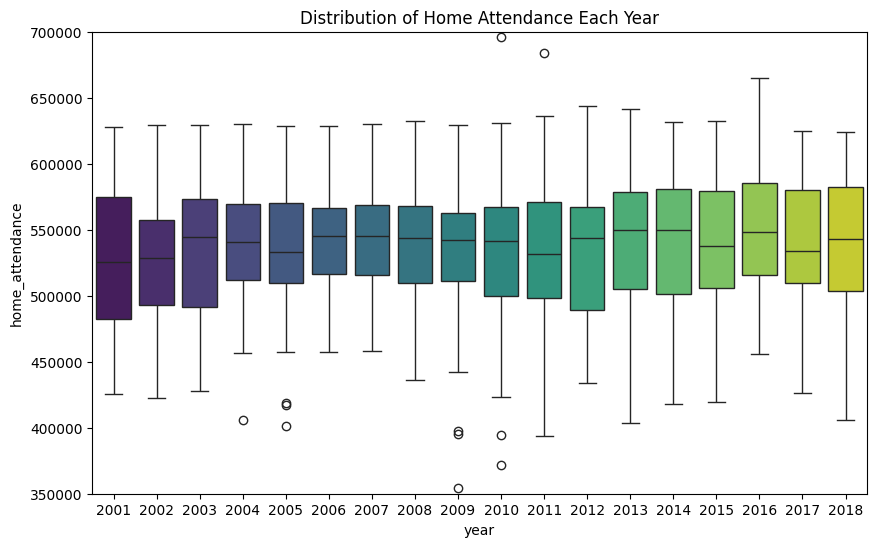

In [20]:
# distribution of home attendance each year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='home_attendance', data=clean_data, palette='viridis', hue='year')
plt.title('Distribution of Home Attendance Each Year')
plt.ylim(350000, 700000)
plt.show()

The data spans from 2001 to 2018, providing an overview of home attendance over these years.

The median home attendance for most years seems to hover around the 500,000 mark, suggesting a consistent level of attendance across the given period.

The interquartile range (the height of each box), which represents the middle 50% of the data, is relatively tight for each year, indicating that most of the data points are not spread out too far from the median.

There are several outliers (indicated by the dots outside of the whiskers) in many of the years. These outliers represent years with exceptionally high or low home attendance compared to the typical range.

The distribution of attendance appears to be slightly skewed in some years, with more outliers on the upper end, suggesting occasional spikes in attendance.

Towards the latter years, especially from 2014 to 2018, there seems to be a slight increase in both the median and the range of attendance, which could indicate a growing trend in home attendance figures.

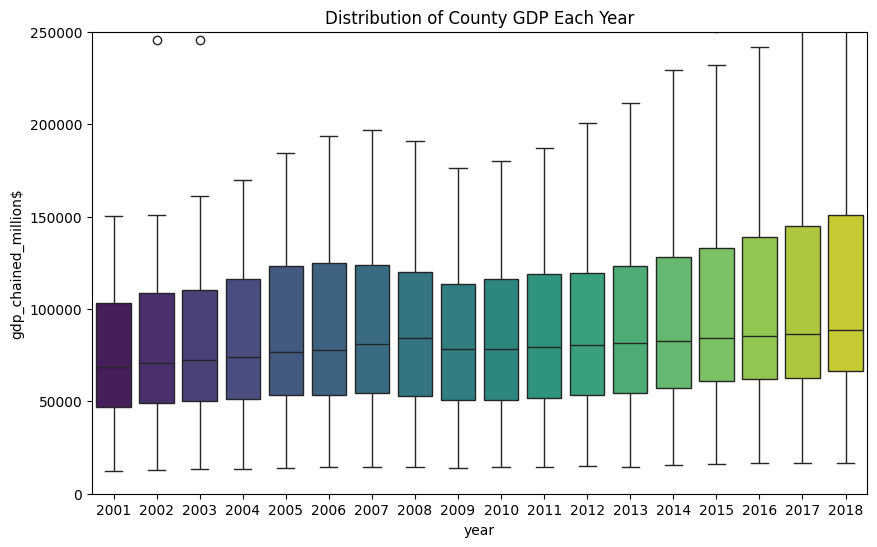

In [21]:
# distribution of county gdp each year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='gdp_chained_million$', data=clean_data, palette='viridis', hue='year')
plt.title('Distribution of County GDP Each Year')
plt.ylim(0, 250000)
plt.show()

The chart suggests that the economy's earnings each year were consistent without significant fluctuations between 2001 and 2018.
The presence of outliers in certain years suggests occasional deviations from the median GDP value, yet these do not represent a general trend of volatility. We have set the ylim to show the appropriate range of the values. However, there are several outliers not shown in the plot, which are extremely high compared with other values. After exploration, we found that the gdp of Los Angeles is always much higher than others.

Overall, the central tendency reflected by the median remains steady throughout the observed period, underscoring a stable economic environment over the 18-year span. But there are counties with particularly high gdp compared with others.

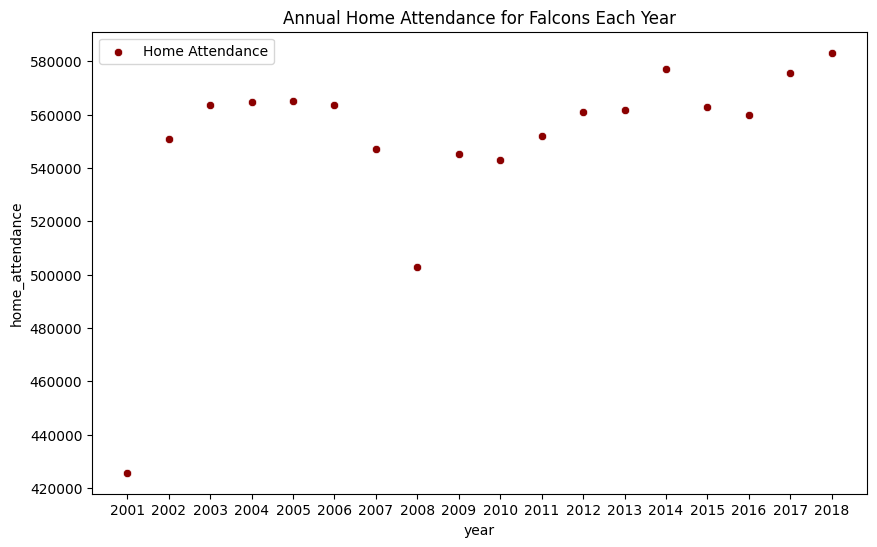

In [22]:
# choose a team (e.g. Cowboys) to show its home attendance, win percentage and county gdp each year
team = 'Falcons'
team_data = clean_data[clean_data['team_name'] == team]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='home_attendance', data=team_data, label='Home Attendance', color='darkred')
plt.title('Annual Home Attendance for Falcons Each Year')
plt.show()

The attendance appears to fluctuate slightly but stays generally within the range of 500,000 to 580,000, indicating a relatively stable fan base attending home games over the years. There is no clear trend of increase or decrease over the time period shown.

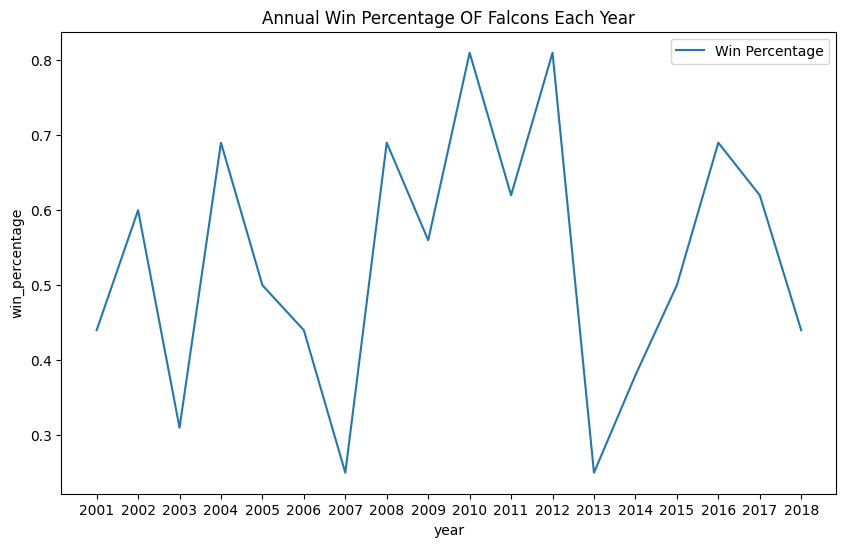

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='win_percentage', data=team_data, label='Win Percentage')
plt.title('Annual Win Percentage OF Falcons Each Year')
plt.show()

The team's performance fluctuated a lot from year to year, showing they were not consistently good. In some years, they win more than 60% of their games, which means they had a really good season. In other years, they won less than 40% of their games, which shows they didn't do as well.

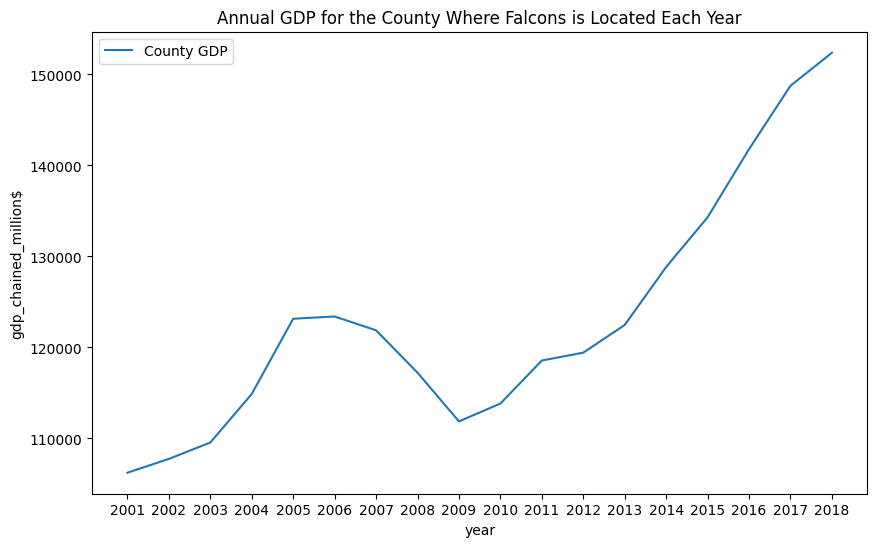

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gdp_chained_million$', data=team_data, label='County GDP')
plt.title('Annual GDP for the County Where Falcons is Located Each Year')
plt.show()

The graph shows that between 2002 and 2010, the GDP numbers fluctuated a lot and didn't follow a set pattern. But from 2010 onwards, it's clear that the GDP starts to increase, showing that the economy is growing. This growth hits its highest point in 2015, then drops a bit, but starts to go up again and keeps rising until 2018.

# Citation

Kapadnis, S. (2023). NFL stadium attendance dataset. Kaggle. https://www.kaggle.com/datasets/sujaykapadnis/nfl-stadium-attendance-dataset

Kapadnis, S. (2023). NFL team standings dataset. Kaggle. https://www.kaggle.com/datasets/sujaykapadnis/nfl-stadium-attendance-dataset?select=standings.csv

Stadiums of Pro Football (2020). NFL stadium comparisons. https://www.stadiumsofprofootball.com/comparisons/

Mahmood, M.A. (2022). Highest GDP counties in USA. Kaggle. https://www.kaggle.com/datasets/muhammadanasmahmood/highest-gdp-counties-in-usa

Data Pandas (n.d.). NFL teams by state. https://www.datapandas.org/ranking/nfl-teams-by-state